<font color="#BB6A65"><h1>Install Kaggle and Set Up Credentials</h1></font>

##### <font color="#CF7E79"> Step 1: Download the Datasets </font>

#####<font color="#CF7E79"> Step 2: Unzip the Datasets </font>

##### <font color="#CF7E79"> Step 3: Check Extracted Files </font>


In [ ]:
# Step 1: Install Kaggle and set up credentials
!pip install kaggle

# Upload kaggle.json (API key)
from google.colab import files
files.upload()  # Upload your kaggle.json file here

# Make a directory for Kaggle and set the correct permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the datasets
# Curated Chest X-ray Image Dataset for COVID-19
!kaggle datasets download -d unaissait/curated-chest-xray-image-dataset-for-covid19
# COVID-19 Radiography Database
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
# Tuberculosis X-ray Dataset
!kaggle datasets download -d fatmaalzhraahmed/tuberculosis

# Step 3: Unzip the datasets if they exist
import os

# Function to unzip datasets
def unzip_dataset(zip_filename, output_dir):
    if os.path.exists(zip_filename):
        !unzip -o {zip_filename} -d {output_dir}
    else:
        print(f"{zip_filename} not found.")

# Unzip datasets
unzip_dataset("curated-chest-xray-image-dataset-for-covid19.zip", './curated_chest_xray')
unzip_dataset("covid19-radiography-database.zip", './covid19_radiography')
unzip_dataset("tuberculosis-xrays.zip", './tuberculosis_xray')

# Step 4: Check the extracted files for each dataset
def list_extracted_files(directory_name):
    print(f"{directory_name}:")
    if os.path.exists(directory_name):
        print(os.listdir(directory_name))
    else:
        print("Directory not found.")

# List extracted files for each dataset
list_extracted_files('./curated_chest_xray')
list_extracted_files('./covid19_radiography')
list_extracted_files('./tuberculosis_xray')


Streaming output truncated to the last 5000 lines.
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: ./covid19_radiography/COVID-19_Radiography_Dataset/Normal/masks/Normal-7936.png  


In [ ]:
unzip_dataset("tuberculosis.zip", './tuberculosis_xray')  # Use the correct filename

Archive:  tuberculosis.zip
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (1).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (10).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (100).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (101).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (102).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (103).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (104).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays/others (105).jpg  
  inflating: ./tuberculosis_xray/Dataset of Tube

<font color="#BB6A65"><h1>Merging and Organizing X-Ray Image Datasets</h1></font>

<p> <font color="#CF7E79"> Step 1: Script merges various X-ray image datasets into a single directory for subsequent preprocessing and analysis</font></p>

<p><font color="#CF7E79"> Step 2: Cleaning Up Unused Directories </font></p>



In [ ]:
import os
import shutil

def merge_image_folders(dir1_path, dir2_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    for file_name in os.listdir(dir2_path):
        file_path = os.path.join(dir2_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Marged file{output_folder_path}")

dir1 = "/content/covid19_radiography/COVID-19_Radiography_Dataset/COVID/images"
dir2 = "/content/curated_chest_xray/Curated X-Ray Dataset/COVID-19"
output_folder = "/content/X-Ray Dataset/COVID-19"
merge_image_folders(dir1, dir2, output_folder)


Marged file/content/X-Ray Dataset/COVID-19


In [ ]:
import os
import shutil

def merge_image_folders(dir1_path, dir2_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    for file_name in os.listdir(dir2_path):
        file_path = os.path.join(dir2_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Marged file{output_folder_path}")

dir1 = "/content/covid19_radiography/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
dir2 = "/content/curated_chest_xray/Curated X-Ray Dataset/Pneumonia-Viral"
output_folder = "/content/X-Ray Dataset/Pneumonia-Viral"
merge_image_folders(dir1, dir2, output_folder)


Marged file/content/X-Ray Dataset/Pneumonia-Viral


In [ ]:
import os
import shutil

def merge_image_folders(dir1_path, dir2_path, output_folder_path):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    for file_name in os.listdir(dir2_path):
        file_path = os.path.join(dir2_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

    print(f"Marged file{output_folder_path}")

dir1 = "/content/covid19_radiography/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
dir2 = "/content/curated_chest_xray/Curated X-Ray Dataset/Pneumonia-Viral"
output_folder = "/content/X-Ray Dataset/Pneumonia-Viral"
merge_image_folders(dir1, dir2, output_folder)


Marged file/content/X-Ray Dataset/Pneumonia-Viral


In [ ]:
dir1_path="/content/covid19_radiography/COVID-19_Radiography_Dataset/Normal/images"
output_folder_path = "/content/X-Ray Dataset/Normal"
if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

In [ ]:
dir1_path="/content/covid19_radiography/COVID-19_Radiography_Dataset/Lung_Opacity/images"
output_folder_path = "/content/X-Ray Dataset/Lung_Opacity"
if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

In [ ]:
dir1_path="/content/curated_chest_xray/Curated X-Ray Dataset/Pneumonia-Bacterial"
output_folder_path = "/content/X-Ray Dataset/Pneumonia-Bacterial"
if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

In [ ]:
dir1_path="/content/curated_chest_xray/Curated X-Ray Dataset/Normal"
output_folder_path = "/content/X-Ray Dataset/Normal"
if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

In [ ]:
dir1_path="/content/tuberculosis_xray/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays"
output_folder_path = "/content/X-Ray Dataset/Tuberculosis"
if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
for file_name in os.listdir(dir1_path):
        file_path = os.path.join(dir1_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy2(file_path, os.path.join(output_folder_path, file_name))

In [ ]:
import shutil
import os

directory_path = "/content/covid19_radiography"

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"File is Delete: {directory_path}")
else:
    print(f"The file is not here: {directory_path}")


File is Delete: /content/covid19_radiography


In [ ]:
import shutil
import os

directory_path = "/content/curated_chest_xray"

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"File is Delete: {directory_path}")
else:
    print(f"The file is not here: {directory_path}")


File is Delete: /content/curated_chest_xray


In [ ]:
import shutil
import os

directory_path = "/content/tuberculosis_xray"

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"File is Delete: {directory_path}")
else:
    print(f"The file is not here: {directory_path}")


File is Delete: /content/tuberculosis_xray


In [ ]:
import os
import shutil
import random


dataset_dir = '/content/X-Ray Dataset'
normal_dir = os.path.join(dataset_dir, 'Normal')
output_dir = os.path.join(dataset_dir, 'Reduced_Normal')

os.makedirs(output_dir, exist_ok=True)

normal_images = os.listdir(normal_dir)

selected_images = random.sample(normal_images, 6500)

for image in selected_images:
    shutil.copy(os.path.join(normal_dir, image), os.path.join(output_dir, image))


In [ ]:
import shutil
import os

directory_path = "/content/X-Ray Dataset/Normal"

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"File is Delete: {directory_path}")
else:
    print(f"The file is not here: {directory_path}")


File is Delete: /content/X-Ray Dataset/Normal


<font color="#BB6A65"><h1>Dataset Preparation for Model Training</h1></font>

##### <font color="#CF7E79">This part splits the dataset into training, validation, and test sets for machine learning. </font>




In [ ]:
import os

output_dir = '/content/X-Ray Dataset'

# List of class names
class_names = ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia_Viral', 'Tuberculosis', 'Lung_Opacity']

# Count images without 'split'
for class_name in class_names:
    class_dir = os.path.join(output_dir, class_name)

    # Check if the directory exists
    if os.path.exists(class_dir):
        # Count the number of images
        num_images = len(os.listdir(class_dir))
        print(f"{class_name}: {num_images} images")
    else:
        print(f"Directory not found: {class_dir}")


COVID-19: 4897 images
Normal: 6500 images
Pneumonia-Bacterial: 3001 images
Pneumonia_Viral: 3001 images
Tuberculosis: 2494 images
Lung_Opacity: 6012 images


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_dir = '/content/X-Ray Dataset'
output_dir = '/content/preprocessed_data'

# Create output directories for train, validation, and test sets
for split in ['train', 'val', 'test']:
    for class_name in ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia_Viral', 'Tuberculosis', 'Lung_Opacity']:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

# Function to copy files
def copy_files(files, src_dir, dest_dir):
    for f in files:
        shutil.copy(os.path.join(src_dir, f), os.path.join(dest_dir, f))

# Split and copy data
for class_name in ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia_Viral', 'Tuberculosis', 'Lung_Opacity']:
    class_dir = os.path.join(base_dir, class_name)
    files = os.listdir(class_dir)

    # Split into train+val (80%) and test (20%)
    train_val, test = train_test_split(files, test_size=0.2, random_state=42)

    # Split train_val into train (70% of original) and validation (10% of original)
    train, val = train_test_split(train_val, test_size=0.125, random_state=42)  # 10% validation

    # Copy files to respective directories
    copy_files(train, class_dir, os.path.join(output_dir, 'train', class_name))
    copy_files(val, class_dir, os.path.join(output_dir, 'val', class_name))
    copy_files(test, class_dir, os.path.join(output_dir, 'test', class_name))

print("Data split and copied successfully!")


Data split and copied successfully!


<font color="#BB6A65"><h1>Data Visualization</h1></font>

##### <font color="#CF7E79">This section visualizes the class distribution in the training dataset using a bar plot.</font>




<ipython-input-20-85a834b79d7c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='count', data=sorted_df, palette='viridis')  # Create the bar plot


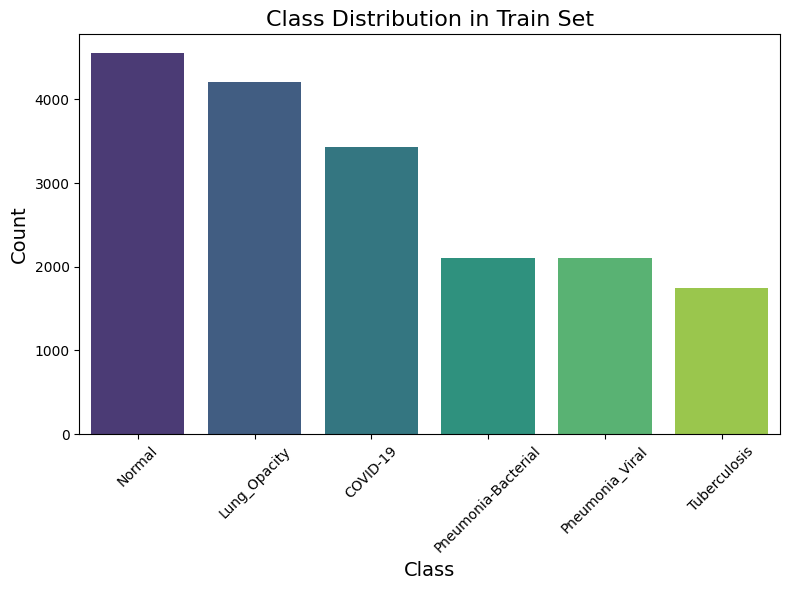

In [ ]:
# Import necessary libraries
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the path for the train dataset
train_dir = '/content/preprocessed_data/train'

# List of classes
categories =['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia_Viral', 'Tuberculosis', 'Lung_Opacity']


# Prepare a list to store the class labels for each file
train_labels = []

# Count the number of files in each class directory and store the labels
for category in categories:
    category_path = os.path.join(train_dir, category)  # Construct the path for the current category
    num_files = len(os.listdir(category_path))  # Count the number of files in the category

    # Append the class label for each file
    train_labels += [category] * num_files

# Create a DataFrame to hold the data
df = pd.DataFrame({'class': train_labels})

# Count occurrences of each class and sort in descending order
class_counts = df['class'].value_counts().sort_values(ascending=False)

# Create a DataFrame for plotting
sorted_df = pd.DataFrame({'class': class_counts.index, 'count': class_counts.values})

# Plot the countplot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='class', y='count', data=sorted_df, palette='viridis')  # Create the bar plot
plt.title('Class Distribution in Train Set', fontsize=16)  # Set the title
plt.xlabel('Class', fontsize=14)  # Set the x-axis label
plt.ylabel('Count', fontsize=14)  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


<font color="#BB6A65"><h1>Chest X-Ray Classification Using Transfer Learning with VGG19</h1></font>

#### <font color="#CF7E79">A Comprehensive Deep Learning Pipeline for Detecting Pneumonia and COVID-19 from X-Ray Images </font>




<font color="#BB6A65"><h3>Import Libraries</h3></font>





In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import models

<font color="#BB6A65"><h3>Define Data Directories</h3></font>





In [ ]:
train_dir = "/content/preprocessed_data/train"
test_dir = "/content/preprocessed_data/test"
val_dir = "/content/preprocessed_data/val"

<font color="#BB6A65"><h3>Data Augmentation</h3></font>

###### <font color="#CF7E79">Create image data generators for data augmentation and normalization.</font>




In [ ]:
train_gen = ImageDataGenerator( rescale= 1. / 255 )
test_gen = ImageDataGenerator(rescale = 1. / 255)
val_gen = ImageDataGenerator(rescale = 1. / 255)

<font color="#BB6A65"><h3>Create Data Generators</h3></font>

##### <font color="#CF7E79">Set up data generators for training, testing, and validation datasets. </font>




In [ ]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size = 128,
    class_mode='sparse'  # or 'categorical'
)
print(train_generator.class_indices)

Found 18129 images belonging to 6 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Bacterial': 3, 'Pneumonia_Viral': 4, 'Tuberculosis': 5}


In [ ]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(test_generator.class_indices)

Found 5184 images belonging to 6 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Bacterial': 3, 'Pneumonia_Viral': 4, 'Tuberculosis': 5}


In [ ]:
val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 128,
    class_mode = 'sparse'
)
print(val_generator.class_indices)

Found 2592 images belonging to 6 classes.
{'COVID-19': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Pneumonia-Bacterial': 3, 'Pneumonia_Viral': 4, 'Tuberculosis': 5}


<font color="#BB6A65"><h3>Load Pre-trained VGG19 Model</h3></font>

##### <font color="#CF7E79">Load the VGG19 model with pre-trained weights and configure layers for transfer learning. </font>




In [ ]:
# Load VGG19 with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last block (block5_conv1 to block5_conv4)
for layer in base_model.layers:
    print(layer.name)
    if 'block5' in layer.name:
        layer.trainable = True

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [ ]:
# Verify if the layers in block5 are unfreezed
for layer in base_model.layers:
    if 'block5' in layer.name:
        print(f"Layer {layer.name} is {'trainable' if layer.trainable else 'frozen'}")

Layer block5_conv1 is trainable
Layer block5_conv2 is trainable
Layer block5_conv3 is trainable
Layer block5_conv4 is trainable
Layer block5_pool is trainable


In [ ]:
# check if the first layer is frozen
for layer in base_model.layers:
  print(f"First layer {layer.name} is {'trainable' if layer.trainable else 'frozen'}")

First layer input_layer is frozen
First layer block1_conv1 is frozen
First layer block1_conv2 is frozen
First layer block1_pool is frozen
First layer block2_conv1 is frozen
First layer block2_conv2 is frozen
First layer block2_pool is frozen
First layer block3_conv1 is frozen
First layer block3_conv2 is frozen
First layer block3_conv3 is frozen
First layer block3_conv4 is frozen
First layer block3_pool is frozen
First layer block4_conv1 is frozen
First layer block4_conv2 is frozen
First layer block4_conv3 is frozen
First layer block4_conv4 is frozen
First layer block4_pool is frozen
First layer block5_conv1 is trainable
First layer block5_conv2 is trainable
First layer block5_conv3 is trainable
First layer block5_conv4 is trainable
First layer block5_pool is trainable


<font color="#BB6A65"><h3>Add Custom Layers</h3></font>

##### <font color="#CF7E79">Add custom layers on top of the VGG19 model for the classification task.</font>




In [ ]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,452,038 (78.02 MB)

 Trainable params: 9,866,886 (37.64 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

<font color="#BB6A65"><h3>Compile the Model</h3></font>

##### <font color="#CF7E79">Compile the model with the Adam optimizer and define the loss function and metrics. </font>




In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Low learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',  # Or 'categorical_crossentropy' if using one-hot encoding
              metrics=['accuracy'])


In [ ]:
import os

num_cores = os.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 2


<font color="#BB6A65"><h3>Callbacks for Training</h3></font>

##### <font color="#CF7E79">Set up callbacks for model checkpointing and early stopping during training.</font>




In [ ]:
# 7. Callbacks for Checkpoints and Early Stopping
checkpoint_full_model = ModelCheckpoint(
    filepath='model_full.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
checkpoint_weights_only = ModelCheckpoint(
    filepath='model.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

<font color="#BB6A65"><h3>Train the Model</h3></font>

##### <font color="#CF7E79">Train the model using the training and validation datasets with defined callbacks.</font>




In [ ]:
# 8. Train the Model with Early Stopping and Checkpoints
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=64,
    callbacks=[checkpoint_full_model, checkpoint_weights_only, early_stopping]
)

Epoch 1/64


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3020 - loss: 1.6618
Epoch 1: val_loss improved from inf to 0.82195, saving model to model_full.keras

Epoch 1: val_loss improved from inf to 0.82195, saving model to model.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.3029 - loss: 1.6601 - val_accuracy: 0.6566 - val_loss: 0.8219
Epoch 2/64
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.6718 - loss: 0.8393
Epoch 2: val_loss improved from 0.82195 to 0.54062, saving model to model_full.keras

Epoch 2: val_loss improved from 0.82195 to 0.54062, saving model to model.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6720 - loss: 0.8388 - val_accuracy: 0.7751 - val_loss: 0.5406
Epoch 3/64
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.7637 - loss: 0.5942
Epoch 3: val_loss improved from 0.54062 to 0.42289, saving model to model_full.keras

Epoch 3: val_loss improved from 0.54062 to 0.42289, saving model to model.weights.h5
142/142 ━

<font color="#BB6A65"><h3>Save the Model</h3></font>





In [ ]:
model.save('X-ray-VGG19-Best-model.h5')

<font color="#BB6A65"><h3>Plot Learning Curves</h3></font>

##### <font color="#CF7E79">Define a function to visualize training and validation accuracy and loss over epochs.</font>




In [ ]:
def plot_learning_curve(history, metrics):
    acc = history.history[metrics]
    val_acc = history.history[f'val_{metrics}']
    # loss = history.history['loss']
    # val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, label=f'training_{metrics}')
    plt.plot(epochs, val_acc, label=f'val_{metrics}')
    plt.scatter(epochs, acc, color='blue')
    plt.scatter(epochs, val_acc, color='blue')
    plt.grid(True, color='gray')
    plt.legend()
    plt.show()

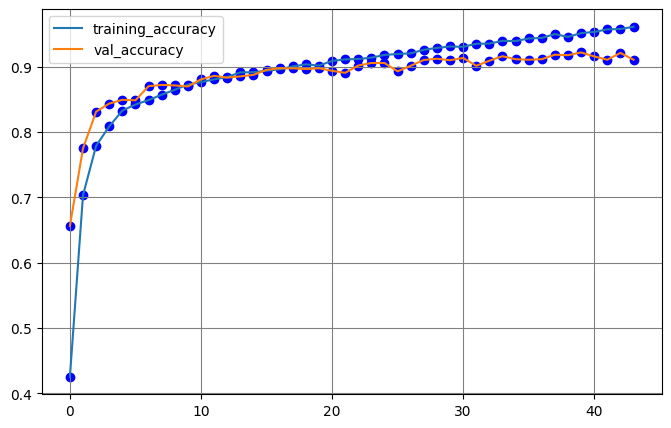

In [ ]:
plot_learning_curve(history=history, metrics='accuracy')

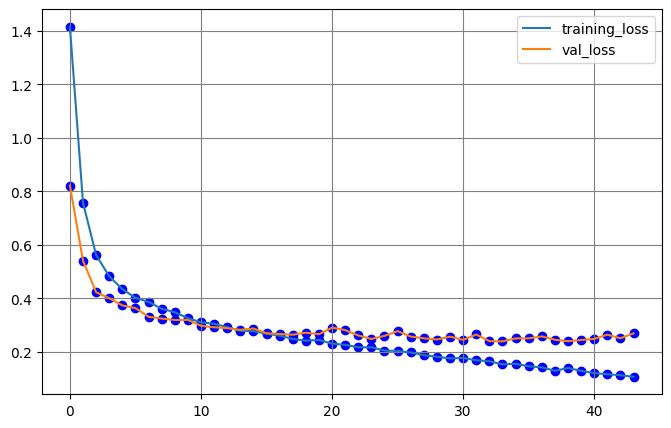

In [ ]:
plot_learning_curve(history=history, metrics='loss')

<font color="#BB6A65"><h3>Evaluate the Model</h3></font>

##### <font color="#CF7E79">Evaluate the model performance on training, testing, and validation datasets. </font>




In [ ]:
train_result = model.evaluate(train_generator)
test_result = model.evaluate(test_generator)
val_result = model.evaluate (val_generator)

142/142 ━━━━━━━━━━━━━━━━━━━━ 118s 825ms/step - accuracy: 0.9561 - loss: 0.1149
41/41 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9182 - loss: 0.2274
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 775ms/step - accuracy: 0.9236 - loss: 0.2227


In [ ]:
print('Train loss:', (np.round(train_result[0], 4)))
print('Test loss:', (np.round(test_result[0], 4)))
print('Val loss:', (np.round(val_result[0], 4)))

print('Train accuracy:', (np.round(train_result[1], 4) * 100) , '%')
print('Test accuracy:', (np.round(test_result[1], 4) * 100) , '%')
print('Val accuracy:', (np.round(val_result[1], 4) * 100) , '%')


Train loss: 0.1166
Test loss: 0.2365
Val loss: 0.2392
Train accuracy: 95.54 %
Test accuracy: 91.64999999999999 %
Val accuracy: 91.63 %


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

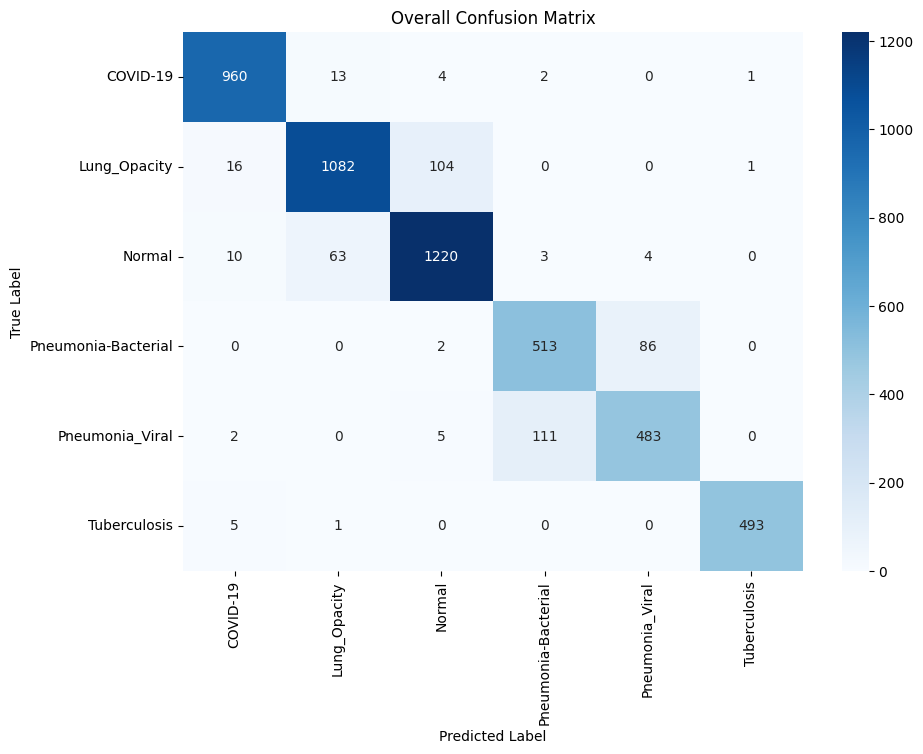

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store predictions and true labels
test_predicts = []
test_targets = []

# Iterate over the test generator to get predictions and true labels
for batch_index, (x_test, y_test) in enumerate(test_generator):
    # Break if you have processed all batches (optional if test_generator has a defined length)
    if batch_index >= len(test_generator):
        break

    # Get predictions for the current batch
    test_predict = model.predict(x_test)

    # Get predicted classes and true classes
    batch_predicts = test_predict.argmax(axis=1)
    batch_targets = y_test

    # Print the classification report for the current batch
#     print(f"Classification Report for Batch {batch_index + 1}:")
#     print(classification_report(batch_targets, batch_predicts))

    # Print confusion matrix for the current batch
#     cm = confusion_matrix(batch_targets, batch_predicts)
#     print(f"Confusion Matrix for Batch {batch_index + 1}:")
#     print(cm)

    # Append to overall lists
    test_predicts.append(batch_predicts)
    test_targets.append(batch_targets)

# Concatenate all predictions and true labels into numpy arrays
test_predicts = np.concatenate(test_predicts)
test_targets = np.concatenate(test_targets)

# Print overall classification report
print("Overall Classification Report:")
print(classification_report(test_targets, test_predicts))

# Print overall confusion matrix
overall_cm = confusion_matrix(test_targets, test_predicts)
print("Overall Confusion Matrix:")
print(overall_cm)
class_names = list(test_generator.class_indices.keys())
# Optionally, visualize the overall confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names ,
            yticklabels=class_names )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Overall Confusion Matrix')
plt.show()